In [2]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load('E_field_data_combined_extended.npz' , allow_pickle=True)
# print(loaded_data)
E_data_combined = loaded_data['data']
sol =[]

for j in {0,30,60,90}:
    for k in range(-6,7):
        for l in {-1,1}:
            for i in E_data_combined:
                if(i[0] == j and i[1] == k and i[2]==l):
                    sol.append(i);
            print(len(sol))

# print(sol)

86
172
258
344
430
516
602
688
774
860
946
1032
1118
1204
1290
1376
1462
1548
1634
1720
1806
1892
1978
2064
2150
2236
2322
2408
2494
2580
2666
2752
2838
2924
3010
3096
3182
3268
3354
3440
3526
3612
3698
3784
3870
3956
4042
4128
4214
4300
4386
4472
4558
4644
4730
4816
4902
4988
5074
5160
5246
5332
5418
5504
5590
5676
5762
5848
5934
6020
6106
6192
6278
6364
6450
6536
6622
6708
6794
6880
6966
7052
7138
7224
7310
7396
7482
7568
7654
7740
7826
7912
7998
8084
8170
8256
8342
8428
8514
8600
8686
8772
8858
8944


In [3]:
sol = np.array(sol)
print(E_data_combined.shape)
print(sol.shape)

(8944, 5)
(8944, 5)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
loaded_data = np.load("E_field_data_combined_extended.npz", allow_pickle=True)
sol = loaded_data["data"]
conditions = sol[:, :-1].astype(np.float32)  # Convert feature data to float32
matrices = np.array([np.array(matrix, dtype=np.float32) for matrix in sol[:, -1]])  # Convert matrices
y_train = matrices[:, 2:99, 2:179]
y_train_min = y_train.min()
y_train_max = y_train.max()
print(y_train_max , y_train_min)
print(matrices.max() , matrices.min())
# y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)



0.6591242 -0.9574031
278.8553 -242.94159


this is Update version with sol

This is with cluster not sufling and no of cluster 104

Train Ranges: [ 31  30  33   2  66  46  83  76  87  56  13  77  34  32   9 102  52  38
  75  15  37   7  29  23  58  11  67  88  44  97  94  22  84  98   3  18
  47   5  93  89  62  65   1  60  71  14 103  35  26  79  49  48  50  55
  64  72  91  21  59  57  96  90  40  36  45  43   6  92  41  85  63  27]
Validation Ranges: [ 24  70  10  86  51   0  61  95  68 100  28]
Test Ranges: [101  17   4   8  78  12  74  39  73  42  54  16  69  81  82  80  99  20
  53  19  25]

Train Indices: [2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2

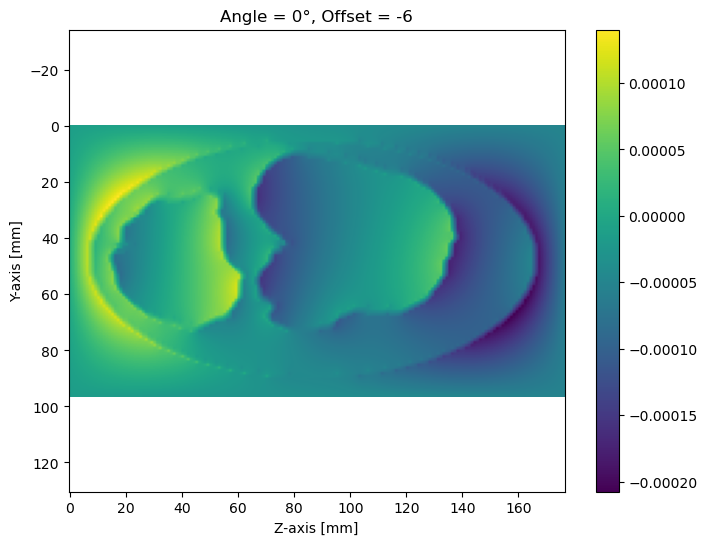

In [5]:
import numpy as np
import matplotlib.pyplot as plt
total_samples = 8944
samples_per_range = 86
num_ranges = total_samples // samples_per_range

# Create ranges
all_ranges = np.arange(num_ranges)
np.random.shuffle(all_ranges)  
train_ranges = all_ranges[:int(0.7 * num_ranges)]
val_ranges = all_ranges[int(0.7 * num_ranges):int(0.8 * num_ranges)]
test_ranges = all_ranges[int(0.8 * num_ranges): int(1.0 * num_ranges)] 

print("Train Ranges:", train_ranges)
print("Validation Ranges:", val_ranges)
print("Test Ranges:", test_ranges)

# Helper function to get indices for each set
def get_indices_from_ranges(ranges, samples_per_range, shuffle=True):
    indices = []
    for r in ranges:
        start = r * samples_per_range
        end = start + samples_per_range
        indices.extend(range(start, end))
    if shuffle:
        np.random.shuffle(indices)
    return indices

# Get indices for train, val, and test sets
train_indices = get_indices_from_ranges(train_ranges, samples_per_range, shuffle=False)
val_indices = get_indices_from_ranges(val_ranges, samples_per_range, shuffle=False)
test_indices = get_indices_from_ranges(test_ranges, samples_per_range, shuffle=False)  # No shuffle

print("\nTrain Indices:", train_indices)
print("Validation Indices:", val_indices)
print("Test Indices:", test_indices)

# Assign data based on indices
X_train_1, y_train_1 = conditions[train_indices], y_train[train_indices]
X_val_1, y_val_1 = conditions[val_indices], y_train[val_indices]
X_test_1, y_test_1 = conditions[test_indices], y_train[test_indices]
# Print shapes of datasets
print("\nShapes of Data:")
print("X_train_1 shape:", X_train_1.shape, "| y_train_1 shape:", y_train_1.shape)
print("X_val_1 shape:", X_val_1.shape, "| y_val_1 shape:", y_val_1.shape)
print("X_test_1 shape:", X_test_1.shape, "| y_test_1 shape:", y_test_1.shape)

# Normalize the datasets
# print("\nGlobal Min (y_train_1):", y_train_min)
# print("Global Max (y_train_1):", y_train_max)

# # Normalize all datasets using training set's global min and max
# y_train_1 = (y_train_1 - y_train_min) / (y_train_max - y_train_min)
# y_val_1 = (y_val_1 - y_train_min) / (y_train_max - y_train_min)
# y_test_1 = (y_test_1 - y_train_min) / (y_train_max - y_train_min)

# Verify normalization
print("\nAfter Normalization:")
print("y_train_1 min:", y_train_1.min(), "| max:", y_train_1.max())
print("y_val_1 min:", y_val_1.min(), "| max:", y_val_1.max())
print("y_test_1 min:", y_test_1.min(), "| max:", y_test_1.max())

# Visualization
selected_index = 84  # Example index for visualization
angle, offset, direction, _, Ex_data = sol[selected_index]
a_check = y_test_1[0].flatten().reshape(97, 177)

plt.figure(figsize=(8, 6))
img = plt.imshow(a_check, cmap="viridis", aspect="auto")
plt.title(f'Angle = {angle}°, Offset = {offset}')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.axis('equal')
plt.colorbar(img)
plt.show()


In [6]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_batch_64.keras')

# Make predictions
y_pred_best_model = model.predict(X_test_1)

# Ensure both y_test_1 and y_pred_best_model have the same shape
y_pred_best_model_squeezed = np.squeeze(y_pred_best_model)  # Remove the extra dimension (97, 177, 1) -> (97, 177)

# Calculate MAE for each sample and its variance
err = np.array([np.mean(np.abs(y_test_1[i, ...] - y_pred_best_model_squeezed[i, ...])) for i in range(y_test_1.shape[0])])
test_mae = np.mean(err)
test_variance = np.var(err)

# Print the results
print("Test MAE (using per-sample mean absolute error):", test_mae)
print("Variance of MAE across samples:", test_variance)

2025-03-19 09:09:59.478033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-19 09:09:59.547410: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 09:10:00.738292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them

13/57 [=====>........................] - ETA: 0s

2025-03-19 09:10:06.132839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


57/57 [==============================] - 1s 11ms/step
Test MAE (using per-sample mean absolute error): 0.6018288
Variance of MAE across samples: 0.0028315024


In [ ]:
print(y_pred_best_model_squeezed.shape)

(1806, 97, 177)


## Now , we are find the Recruiyment Index  and Selectivity index  

update on the test dataset 

In [ ]:
def optimize_dataset(X_data, y_data, samples_per_range=86):
    """
    Optimize both X and Y datasets by calculating differences for consecutive matrices.
    
    Parameters:
        X_data (numpy.ndarray): Feature dataset.
        y_data (numpy.ndarray): Label dataset.
        samples_per_range (int): Number of samples per interval.
    
    Returns:
        tuple: Optimized X, Y datasets and updated intervals.
    """
    n_samples = len(X_data)
    n_intervals = n_samples // samples_per_range
    opt_X, opt_y, updated_intervals = [], [], []

    for i in range(n_intervals):
        start, end = i * samples_per_range, (i + 1) * samples_per_range
        X_interval = X_data[start:end]
        y_interval = y_data[start:end]
        
        # Calculate differences between consecutive elementswh
        diff_X = np.diff(X_interval, axis=0)
        diff_y = np.diff(y_interval, axis=0)
        
        opt_X.append(diff_X)
        opt_y.append(diff_y)
        updated_intervals.append((start, start + len(diff_X) - 1))
        
        print(f"Interval {i + 1}: Start={start}, End={end - 1}, Removed={end - 1}")
        print(f"Updated Interval {i + 1}: Start={start}, End={start + len(diff_X) - 1}")

    # Combine the optimized data
    opt_X = np.vstack(opt_X)
    opt_y = np.vstack(opt_y)
    
    print(f"\nOriginal X Shape: {X_data.shape}, Optimized X Shape: {opt_X.shape}")
    print(f"Original Y Shape: {y_data.shape}, Optimized Y Shape: {opt_y.shape}")
    
    print("\nUpdated Intervals:")
    for i, (s, e) in enumerate(updated_intervals, 1):
        print(f"Interval {i}: Start={s}, End={e}")
        
    return opt_X, opt_y, updated_intervals

# Example usage
opt_X, opt_y, updated_intervals = optimize_dataset(X_test_1, y_pred_best_model_squeezed)
print(f"\nOptimized X Shape: {opt_X.shape}, Optimized Y Shape: {opt_y.shape}")
print(f"Updated Intervals: {updated_intervals}")


Interval 1: Start=0, End=85, Removed=85
Updated Interval 1: Start=0, End=84
Interval 2: Start=86, End=171, Removed=171
Updated Interval 2: Start=86, End=170
Interval 3: Start=172, End=257, Removed=257
Updated Interval 3: Start=172, End=256
Interval 4: Start=258, End=343, Removed=343
Updated Interval 4: Start=258, End=342
Interval 5: Start=344, End=429, Removed=429
Updated Interval 5: Start=344, End=428
Interval 6: Start=430, End=515, Removed=515
Updated Interval 6: Start=430, End=514
Interval 7: Start=516, End=601, Removed=601
Updated Interval 7: Start=516, End=600
Interval 8: Start=602, End=687, Removed=687
Updated Interval 8: Start=602, End=686
Interval 9: Start=688, End=773, Removed=773
Updated Interval 9: Start=688, End=772
Interval 10: Start=774, End=859, Removed=859
Updated Interval 10: Start=774, End=858
Interval 11: Start=860, End=945, Removed=945
Updated Interval 11: Start=860, End=944
Interval 12: Start=946, End=1031, Removed=1031
Updated Interval 12: Start=946, End=1030
Inte

In [ ]:
import numpy as np

def create_max_image_per_interval(opt_y, updated_intervals):
    """
    Create a single maximized image for each interval by taking the pixel-wise maximum
    over all frames in that interval.

    Parameters:
    -----------
    opt_y : numpy.ndarray
        Optimized Y dataset of shape (N, H, W), where N is the number of frames,
        and (H, W) = (97, 177) in your example.
    updated_intervals : list of tuples
        List of (start, end) index pairs indicating the intervals (inclusive).

    Returns:
    --------
    final_images : numpy.ndarray
        An array of shape (num_intervals, H, W) where each entry is the pixel-wise
        maximum across all frames in the corresponding interval.
    """
    final_images = []

    for i, (start, end) in enumerate(updated_intervals, 1):
        # Slice the opt_y data for the current interval
        interval_data = opt_y[start : end + 1]  # end+1 because 'end' is inclusive
        
        # Compute the pixel-wise maximum across the interval
        max_image = np.max(interval_data, axis=0)
        
        final_images.append(max_image)
        
        print(f"Interval {i}: Start={start}, End={end}, "
              f"Interval shape={interval_data.shape}, Max image shape={max_image.shape}")
    
    # Convert list of images to a single NumPy array
    final_images = np.array(final_images)
    return final_images

# Example usage (assuming 'opt_y' and 'updated_intervals' are already defined):
final_images = create_max_image_per_interval(opt_y, updated_intervals)
print("Final images shape:", final_images.shape)


Interval 1: Start=0, End=84, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 2: Start=86, End=170, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 3: Start=172, End=256, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 4: Start=258, End=342, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 5: Start=344, End=428, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 6: Start=430, End=514, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 7: Start=516, End=600, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 8: Start=602, End=686, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 9: Start=688, End=772, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 10: Start=774, End=858, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 11: Start=860, End=944, Interval shape=(85, 97, 177), Max image shape=(97, 177)
Interval 12: Start=946, End=1030, 

# plotting image for each interval  fior testing data 

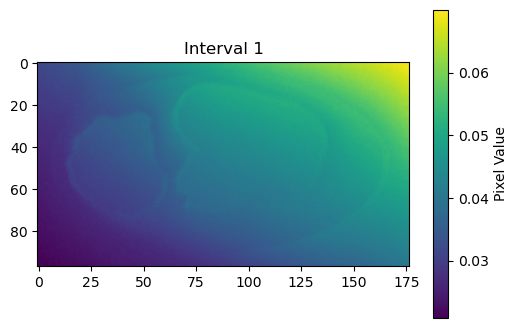

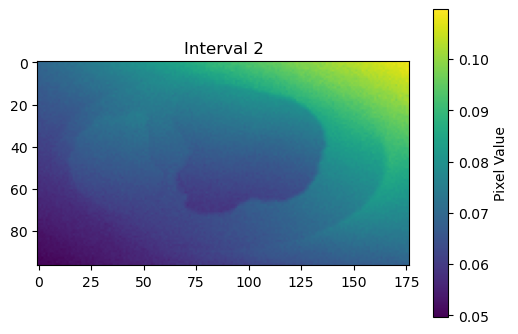

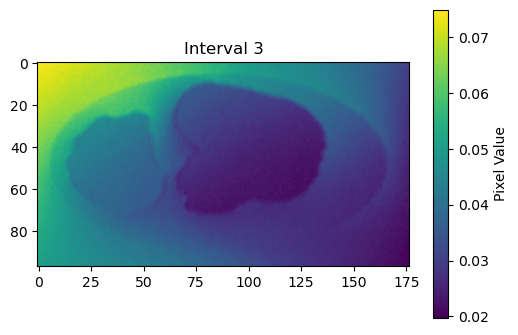

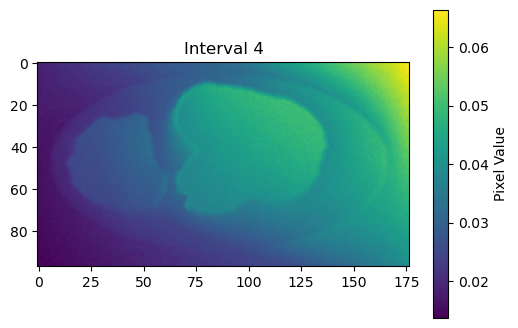

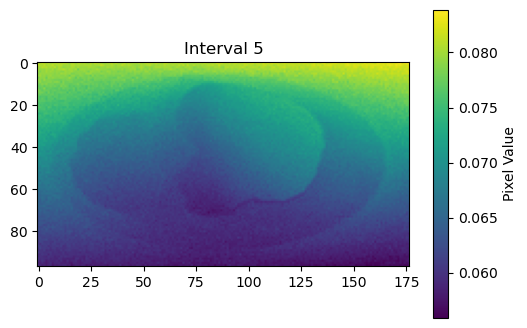

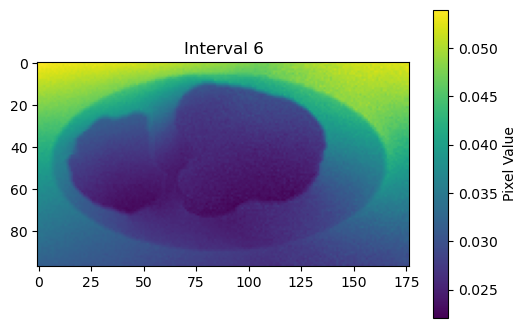

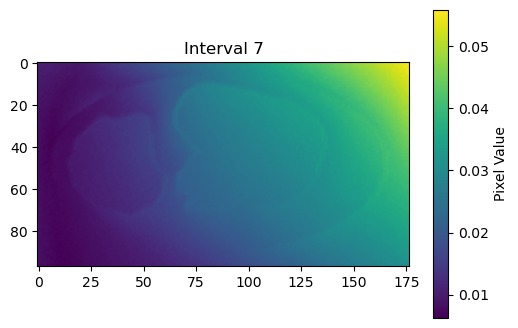

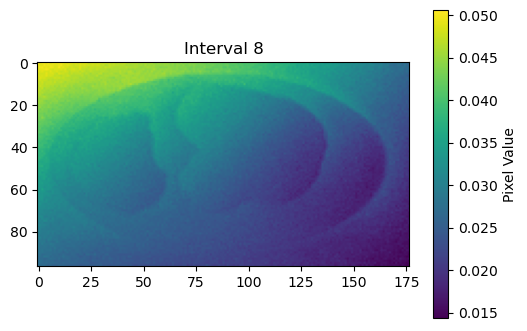

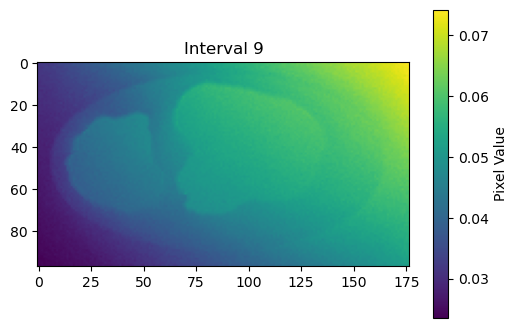

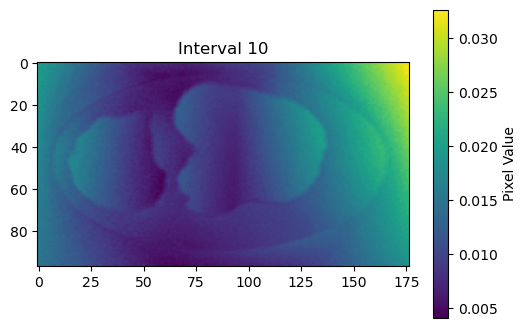

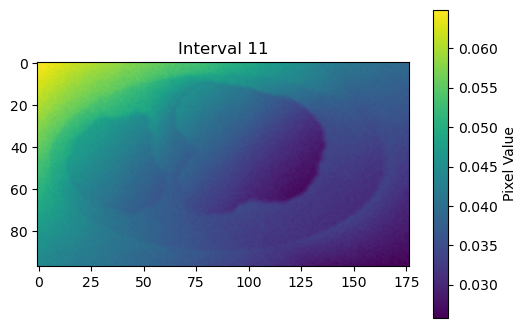

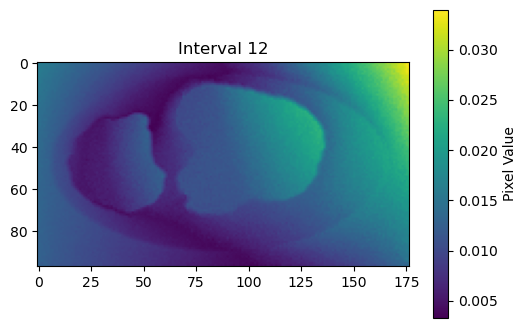

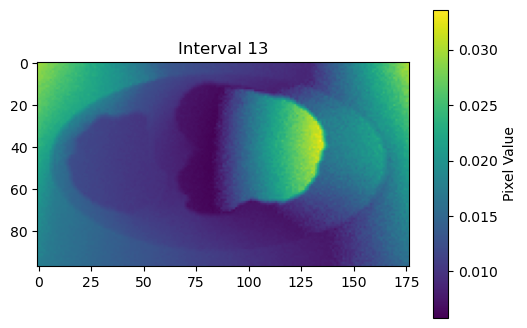

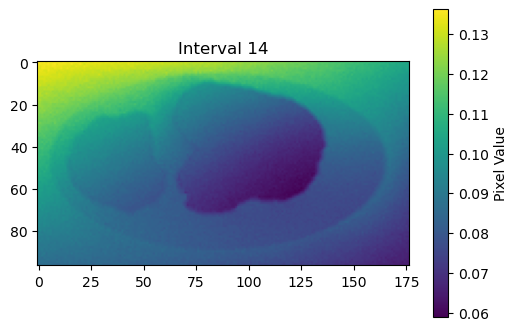

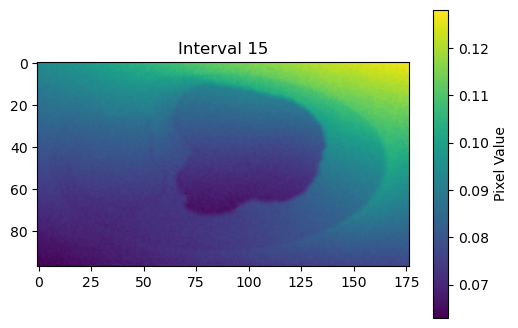

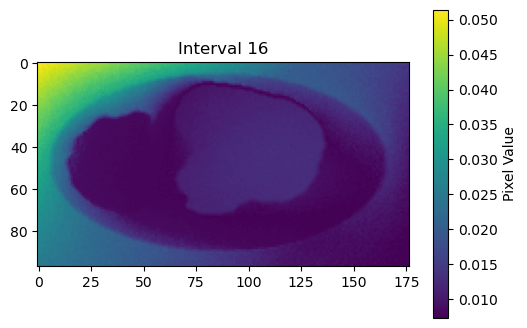

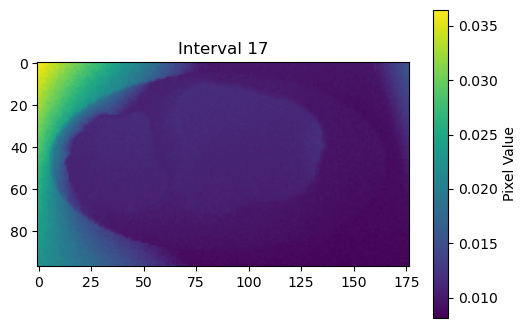

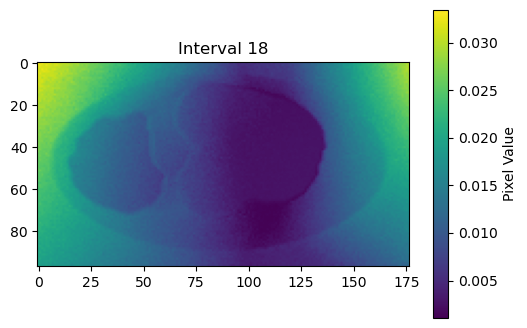

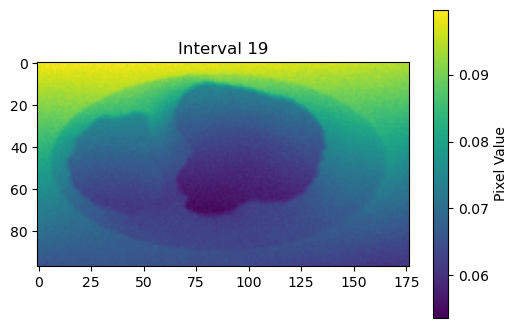

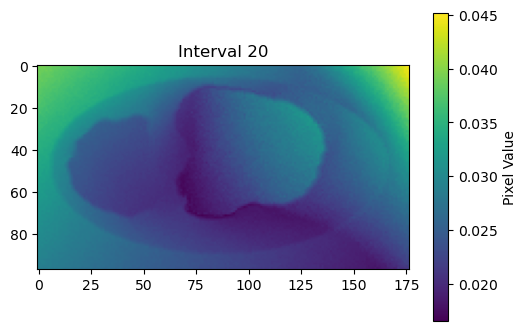

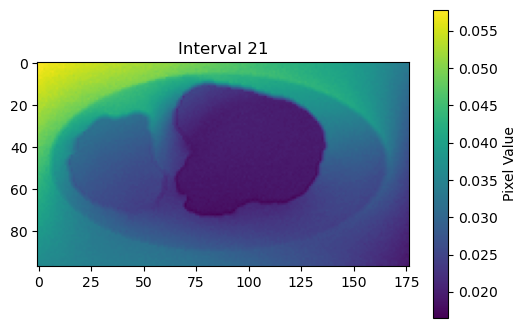

In [ ]:
import matplotlib.pyplot as plt

def visualize_final_images(final_images):
    """
    Visualize each image in `final_images` using a viridis colormap.
    
    Parameters:
    -----------
    final_images : numpy.ndarray
        Array of shape (num_intervals, H, W), where each slice along the
        first dimension is the image you want to visualize.
    """
    for i, image in enumerate(final_images, start=1):
        plt.figure(figsize=(6, 4))
        plt.imshow(image, cmap='viridis')
        plt.title(f"Interval {i}")
        plt.colorbar(label='Pixel Value')
        plt.show()

# Example usage after creating final_images:
visualize_final_images(final_images)


## now , we are to make the nerver selected fascicle

In [ ]:
import numpy as np
loaded_nerve = np.load('nerve_2D_cross_section.npy')
loaded_nerve = loaded_nerve[2:99, 2:179]
print(loaded_nerve.min())
print(loaded_nerve.max())
print("Loaded nerve shape:", loaded_nerve.shape)

1.0
5.0
Loaded nerve shape: (97, 177)


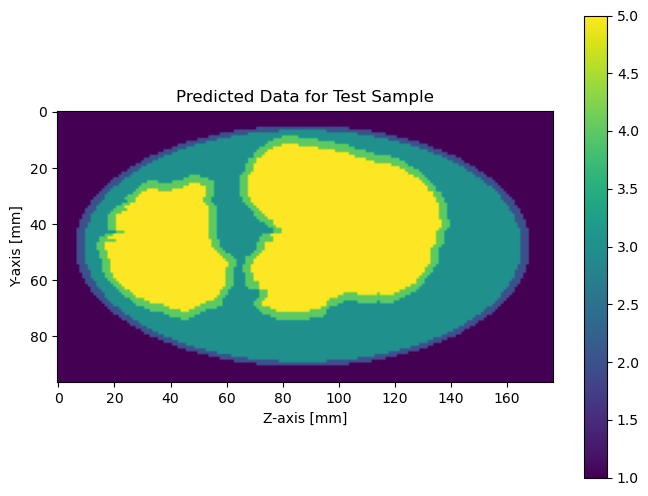

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
img_pred= plt.imshow(loaded_nerve, cmap='viridis')  # Plot predicted data slice
plt.title(f'Predicted Data for Test Sample')
plt.xlabel('Z-axis [mm]')
plt.ylabel('Y-axis [mm]')
plt.colorbar(img_pred)
plt.show()

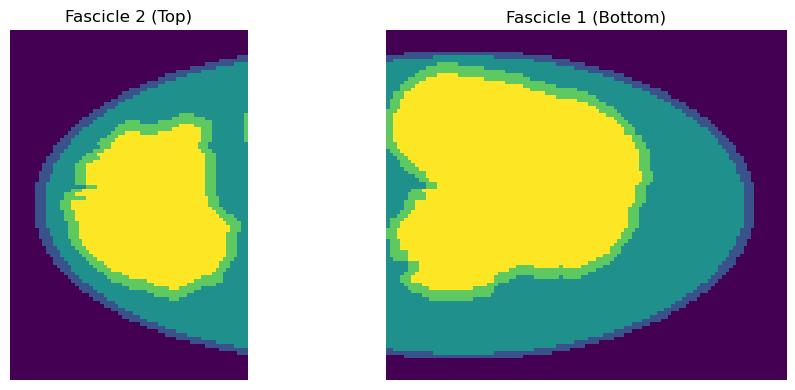

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_fascicles_single(image):
    """
    Visualize the fascicle parts from a single image.
    
    Fascicle 2 (top): rows 0:66
    Fascicle 1 (bottom): rows 66:97

    Parameters
    ----------
    image : numpy.ndarray
        Array of shape (97, 177)
    """
    # Fascicle 2 (top portion): rows 0 to 65
    fascicle2 = image[:, :66]   # shape (66, 177)
    # Fascicle 1 (bottom portion): rows 66 to 96
    fascicle1 = image[:, 66:]   # shape (31, 177)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Show Fascicle 2 (Top)
    axes[0].imshow(fascicle2, cmap='viridis')
    axes[0].set_title("Fascicle 2 (Top)")
    axes[0].axis('off')  # Hide axes

    # Show Fascicle 1 (Bottom)
    axes[1].imshow(fascicle1, cmap='viridis')
    axes[1].set_title("Fascicle 1 (Bottom)")
    axes[1].axis('off')  # Hide axes

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Example usage:
# Create a dummy image of size (97, 177)
# image = np.random.rand(97, 177)
visualize_fascicles_single(loaded_nerve)


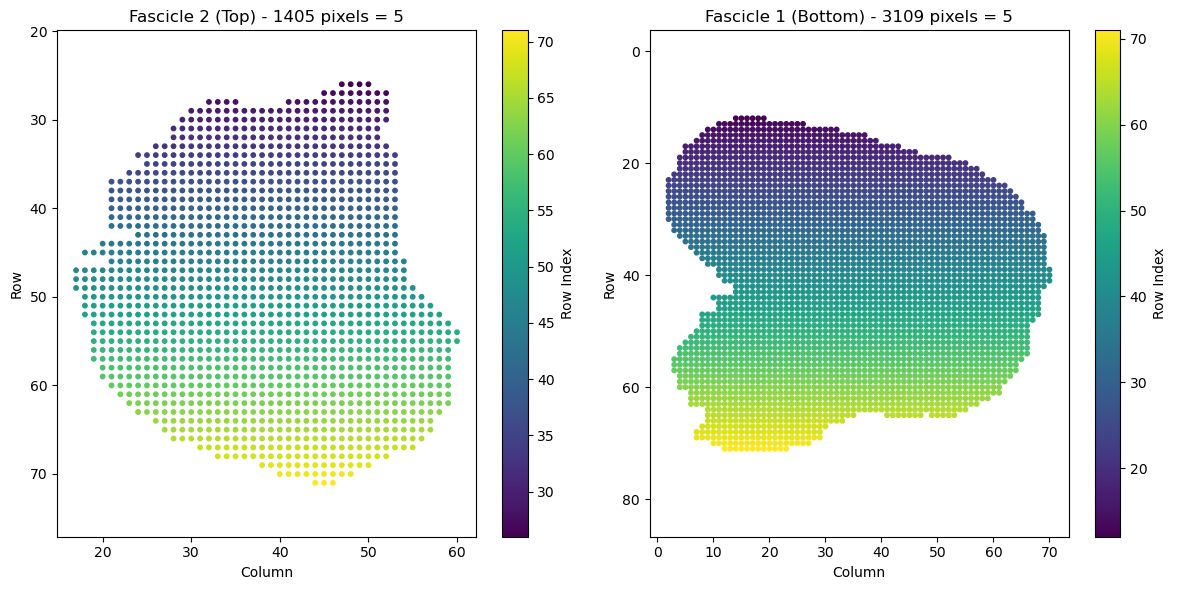

Value of N1 and N2 are: 1405 3109
Top coordinates:
 [[26 47]
 [26 48]
 [26 49]
 ...
 [71 44]
 [71 45]
 [71 46]]
Bottom coordinates:
 [[12 14]
 [12 15]
 [12 16]
 ...
 [71 21]
 [71 22]
 [71 23]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_fascicles_single(image):
    # -- Fix #1: Split the image along the row dimension to match the docstring --
    fascicle2 = image[:,:66]   # Top portion: rows 0 to 65
    fascicle1 = image[:,66:]   # Bottom portion: rows 66 to 96

    # Find indices where the pixel value equals 5
    top_y, top_x = np.where(fascicle2 == 5)
    bottom_y, bottom_x = np.where(fascicle1 == 5)

    # Count the number of pixels equal to 5 in each fascicle
    N1 = len(top_y)
    N2 = len(bottom_y)

    # Store coordinates as (row, column)
    top_coords = np.column_stack((top_y, top_x))
    bottom_coords = np.column_stack((bottom_y, bottom_x))

    # Create figure for scatter plot visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # -- Fix #2: Use cmap instead of the incorrect 'cmp' --
    # Plot for Fascicle 2 (Top)
    scatter_top = axes[0].scatter(top_x, top_y, c=top_y, cmap="viridis", s=10)
    axes[0].set_title(f"Fascicle 2 (Top) - {N1} pixels = 5")
    axes[0].set_xlim(0, fascicle2.shape[1])
    axes[0].set_ylim(fascicle2.shape[0], 0)  # Invert y-axis
    axes[0].set_xlabel("Column")
    axes[0].set_ylabel("Row")
    axes[0].axis("equal")
    fig.colorbar(scatter_top, ax=axes[0], label="Row Index")

    # Plot for Fascicle 1 (Bottom)
    scatter_bottom = axes[1].scatter(bottom_x, bottom_y, c=bottom_y, cmap="viridis", s=10)
    axes[1].set_title(f"Fascicle 1 (Bottom) - {N2} pixels = 5")
    axes[1].set_xlim(0, fascicle1.shape[1])
    axes[1].set_ylim(fascicle1.shape[0], 0)  # Invert y-axis
    axes[1].set_xlabel("Column")
    axes[1].set_ylabel("Row")
    axes[1].axis("equal")
    fig.colorbar(scatter_bottom, ax=axes[1], label="Row Index")

    plt.tight_layout()
    plt.show()

    return N1, N2, top_coords, bottom_coords

# Example usage:
# loaded_nerve = np.random.randint(0, 10, size=(97, 177))  # Example dummy data
N1, N2, top_coords, bottom_coords = visualize_fascicles_single(loaded_nerve)
print("Value of N1 and N2 are:", N1, N2)
print("Top coordinates:\n", top_coords)
print("Bottom coordinates:\n", bottom_coords)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_reference_coordinates(loaded_nerve):
    """
    Get coordinates from loaded_nerve where value is 5 (fascicle regions).
    
    Parameters
    ----------
    loaded_nerve : np.ndarray
        Reference image (97, 177) for fascicle regions.

    Returns
    -------
    fascicle_coords : np.ndarray
        Array of shape (N, 2) with (row, column) coordinates.
    """
    ref_y, ref_x = np.where(loaded_nerve == 5)
    fascicle_coords = np.column_stack((ref_y, ref_x))
    return fascicle_coords


def visualize_with_reference(final_images, fascicle_coords):
    """
    Visualize values from each image at locations defined by loaded_nerve.
    
    Parameters
    ----------
    final_images : np.ndarray
        Array of shape (21, 97, 177).
    fascicle_coords : np.ndarray
        Coordinates from loaded_nerve where value == 5.
    """
    for i, img in enumerate(final_images, start=1):
        # Extract values from current image using reference coordinates
        values = img[fascicle_coords[:, 0], fascicle_coords[:, 1]]

        # Display the number of matched pixels
        N = len(values)
        print(f"Image {i}: Displaying {N} pixels from reference fascicle locations.")

        # Create scatter plot
        plt.figure(figsize=(7, 6))
        scatter = plt.scatter(
            fascicle_coords[:, 1], fascicle_coords[:, 0],
            c=values, cmap='viridis', s=10
        )
        plt.title(f"Image {i}: Fascicle Regions (from loaded_nerve)")
        plt.xlabel("Column")
        plt.ylabel("Row")
        plt.gca().invert_yaxis()  # Invert y-axis for image coordinates
        plt.colorbar(scatter, label="Pixel Value (Current Image)")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.axis('equal')
        plt.show()




# Step 1: Get fascicle coordinates from 'loaded_nerve'
fascicle_coords = get_reference_coordinates(loaded_nerve)

# Step 2: Visualize each image at reference locations
# visualize_with_reference(final_images, fascicle_coords)


In [ ]:
print(len(fascicle_coords))

4514


In [ ]:
import numpy as np

def get_reference_coordinates(loaded_nerve):
    """
    Get coordinates from loaded_nerve where value is 5 (fascicle regions).
    
    Parameters
    ----------
    loaded_nerve : np.ndarray
        Reference image (97, 177) for fascicle regions.

    Returns
    -------
    fascicle1_coords : np.ndarray
        Coordinates for fascicle1 (right).
    fascicle2_coords : np.ndarray
        Coordinates for fascicle2 (left).
    """
    ref_y, ref_x = np.where(loaded_nerve == 5)
    fascicle_coords = np.column_stack((ref_y, ref_x))

    # Split coordinates into fascicle1 (right) and fascicle2 (left)
    fascicle2_coords = fascicle_coords[fascicle_coords[:, 1] < 66]  # Left 66 columns
    fascicle1_coords = fascicle_coords[fascicle_coords[:, 1] >= 66]  # Right 111 columns

    return fascicle1_coords, fascicle2_coords

def compute_indices(image, fascicle1_coords, fascicle2_coords, threshold=5):
    """
    Compute Recruitment Index and Selectivity Index for a given image.
    
    Parameters:
        image (numpy array): 2D array of shape (97, 177).
        fascicle1_coords (numpy array): Coordinates for fascicle1.
        fascicle2_coords (numpy array): Coordinates for fascicle2.
        threshold (int): Threshold value for counting pixels.
    
    Returns:
        tuple: (u1, u2, S) where:
            - u1 = Recruitment Index for fascicle2
            - u2 = Recruitment Index for fascicle1
            - S = Selectivity Index (u1 - u2)
    """
    # Count threshold-meeting pixels in each fascicle
    N1 = np.sum(image[fascicle2_coords[:, 0], fascicle2_coords[:, 1]] >= threshold)
    N2 = np.sum(image[fascicle1_coords[:, 0], fascicle1_coords[:, 1]] >= threshold)

    # Get the total valid pixels in each fascicle
    total_fascicle2 = len(fascicle2_coords)
    total_fascicle1 = len(fascicle1_coords)

    # Compute Recruitment Index
    u1 = N1 / total_fascicle2 if total_fascicle2 > 0 else 0
    u2 = N2 / total_fascicle1 if total_fascicle1 > 0 else 0

    # Compute Selectivity Index
    S = u1 - u2

    return u1, u2, S

def process_images_with_scaling(images, loaded_nerve, scaling_factors):
    """
    Process images with different scaling factors and print Recruitment and Selectivity Index.
    
    Parameters:
        images (numpy array): 3D array of shape (21, 97, 177).
        loaded_nerve (numpy array): 2D reference image defining fascicle regions.
        scaling_factors (list): List of scaling values to apply to the images.
    """
    # Get fascicle reference coordinates
    fascicle1_coords, fascicle2_coords = get_reference_coordinates(loaded_nerve)
    
    for scale in scaling_factors:
        print(f"\n### Scaling Factor: {scale} ###")
        for i, img in enumerate(images):
            scaled_img = img * scale  # Apply scaling
            u1, u2, S = compute_indices(scaled_img, fascicle1_coords, fascicle2_coords)
            print(f"Image {i+1}: u1={u1:.4f}, u2={u2:.4f}, Selectivity Index={S:.4f}")

# Example usage
scaling_factors = [10, 50, 100, 200, 300, 1000]
process_images_with_scaling(final_images, loaded_nerve, scaling_factors)



### Scaling Factor: 10 ###
Image 1: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 2: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 3: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 4: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 5: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 6: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 7: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 8: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 9: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 10: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 11: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 12: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 13: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 14: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 15: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 16: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 17: u1=0.0000, u2=0.0000, Selectivity Index=0.0000
Image 18: u1